# Second Notebook on a House Price Prediction Model  
# Supervised Machine Learning  

### Given Explanations:
from "data_description-iter-0-2.txt":
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* TotalBsmtSF: Total square feet of basement area
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
* Fireplaces: Number of fireplaces
* PoolArea: Pool area in square feet
* GarageCars: Size of garage in car capacity
* WoodDeckSF: Wood deck area in square feet
* ScreenPorch: Screen porch area in square feet*

## 1. Import modules and .csv, preparation:

In [12]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

housing_classific = pd.read_csv(r'housing-classification-iter-0-2.csv')


In the first notebook we discovered missing values at "LotFrontage" column,  
since this is a important value and the model cannot deal with missing values,  
we should drop those rows:

In [13]:
# always train .loc and the usage of tilde :P :
housing_classific = housing_classific.loc[~housing_classific.LotFrontage.isna(), :]
# housing_classific.info() # see if it worked

In [14]:
# More elegant way to set X and y than in 1st notebook (but note the difference!):
X = housing_classific
y = housing_classific.pop('Expensive')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337) # there is only one true random_state.

## 2. Implementing a decison tree:

In [15]:
my_tree_house = DecisionTreeClassifier() # FU! i forgot that parenthesis at the end. CAN THIS FUCKING ERROR MESSAGE NOT POINT TOWARDS THAT?!!!
my_tree_house.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [16]:
# Predicting with train set:
y_pred_tree_house_train = my_tree_house.predict(X_train)

In [17]:
# Accuracy:
accuracy_score(y_true = y_train,
              y_pred = y_pred_tree_house_train
              )

1.0

In [18]:
# Applying above to check on test set:
y_pred_tree_house_test = my_tree_house.predict(X_test)
# Checking via acc. score:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_house_test)

0.9087136929460581

Kind of cool to see here, that a not pruned tree might do something...

## 3. P(l)otting a tree:

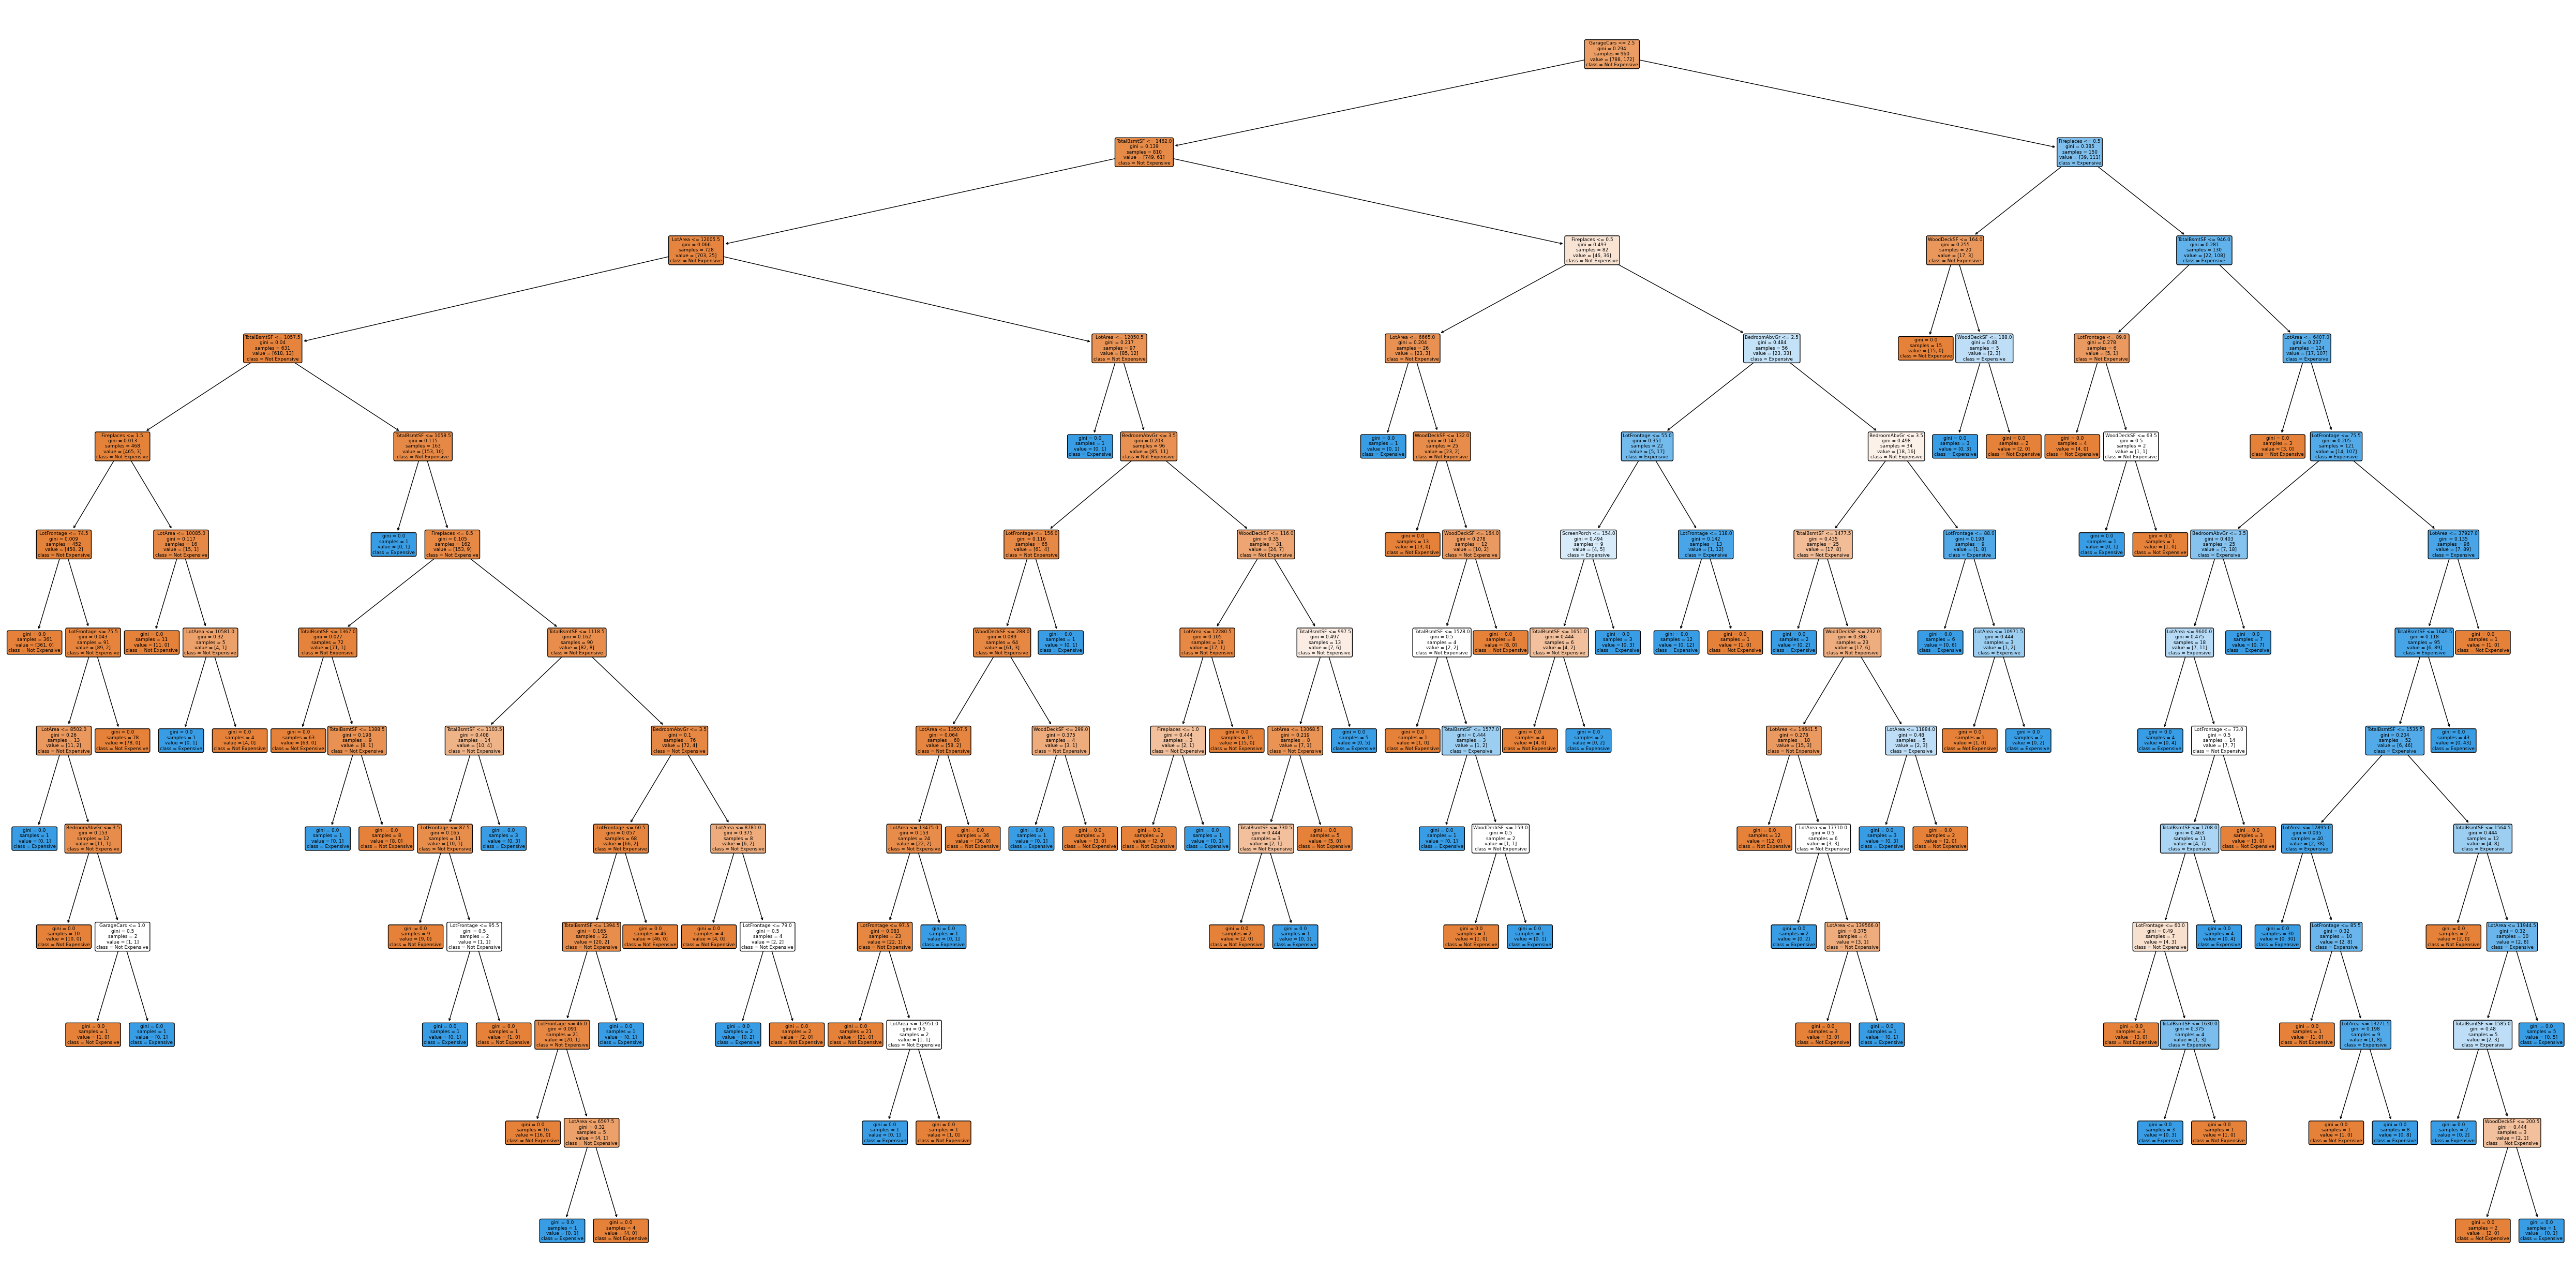

In [19]:
plt.figure(figsize=(64, 32))

plot_tree(
     my_tree_house,
     filled=True, 
     rounded=True, 
     class_names=['Not Expensive','Expensive'], 
     feature_names=housing_classific.columns
     );

## 4. About Sogging and Scrogging - Pruning the "tree":

In [20]:
# After investigating the original tree output a bit closer,
# i decided for a range of around 3 leaves
# (many "dead-ends" there and 3 out of ~1200 still a meaningful value,
# since we are around 90+% already!!!)
# and a depth of ~11 to really work on overfitting:
my_tree_pruned = DecisionTreeClassifier(max_depth=11,
                                        min_samples_leaf=3)

In [21]:
my_tree_pruned.fit(X=X_train, y=y_train)
y_pred_tree_pruned_train = my_tree_pruned.predict(X_train)
accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_pruned_train
              )

0.9677083333333333

In [22]:
my_tree_pruned.fit(X=X_test, y=y_test)
y_pred_tree_pruned_test = my_tree_pruned.predict(X_test)
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_pruned_test
              )

0.979253112033195

## Another Conclusion here:
* Depending on how heavy we prune the tree, we come pretty close to 100%. 
* 97% seems like a great benchmark. But have to check for overfitting, other data needed!
* we can simply change accuracy from there, e.g. depth<=10 leaf>=4 leads to around 95%!